In [1]:
"""
TO BE ADDED:

- GridSearchCV
- Feature importance

"""


# Data wrangling libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_predict

# Regression libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Metric libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df = pd.read_csv("data_cleaned.csv")
#df = df.drop(columns=['postcode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38986 entries, 0 to 38985
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedroomcount               38986 non-null  float64
 1   postcode                   38986 non-null  int64  
 2   habitablesurface           38986 non-null  int64  
 3   haslift                    38986 non-null  int64  
 4   hasgarden                  38986 non-null  int64  
 5   hasswimmingpool            38986 non-null  int64  
 6   hasterrace                 38986 non-null  int64  
 7   price                      38986 non-null  float64
 8   hasparking                 38986 non-null  int64  
 9   epcscore_encoded           38986 non-null  float64
 10  buildingcondition_encoded  38986 non-null  float64
 11  region_Brussels            38986 non-null  float64
 12  region_Flanders            38986 non-null  float64
 13  region_Wallonia            38986 non-null  flo

In [3]:
df_all = df
df_hs = df[df['type_encoded'] == 1]  # Houses
df_apt = df[df['type_encoded'] == 0]  # Apartments

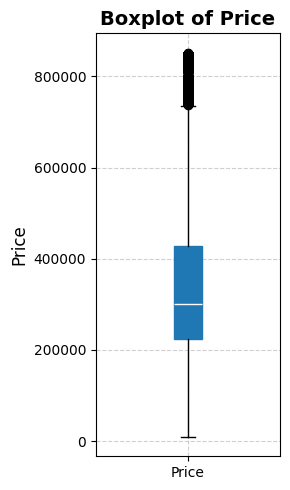

In [4]:
target = 'price'

import matplotlib.pyplot as plt

plt.figure(figsize=(3, 5))
plt.boxplot(df[target], patch_artist=True, boxprops=dict(facecolor='#1f77b4', color='#1f77b4'),
            medianprops=dict(color='white'))

plt.title(f'Boxplot of {target.capitalize()}', fontsize=14, fontweight='bold')
plt.ylabel(target.capitalize(), fontsize=12)
plt.xticks([1], [target.capitalize()])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
def splitDF(df, target):
    # Select target
    y = df[target]
    # Select predictors
    X = df.drop([target], axis=1)
    return X, y


In [6]:
def regResults(df, name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Append metrics to results list
    results.append({
        "Dataset": df,
        "Model": name,
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })


In [7]:
def plotPredictions(df, name, y_true, y_pred):
    plt.figure(figsize=(5, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
    plt.title(f"{name} - {df} — Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# REGRESSION MODELS

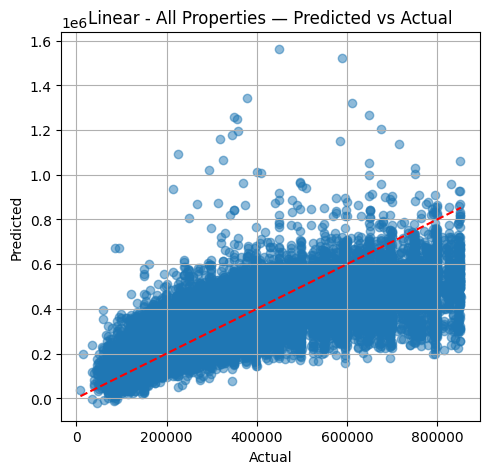

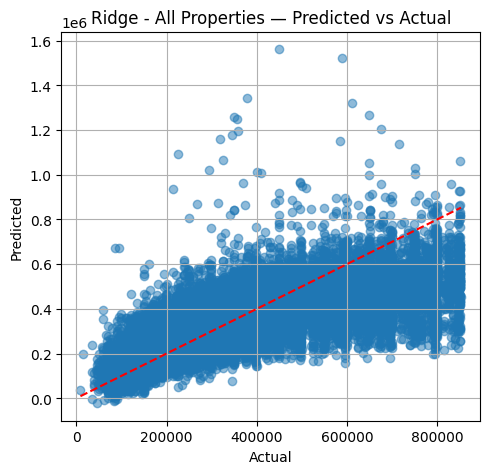

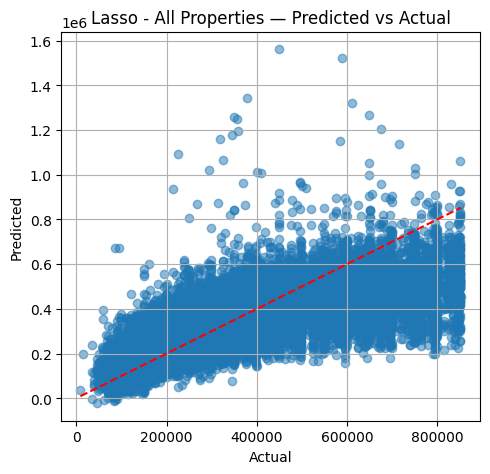

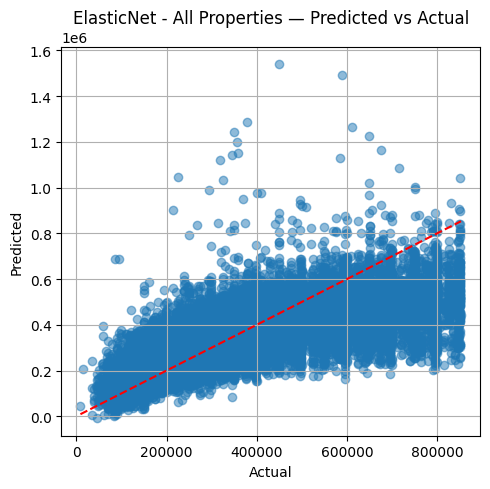

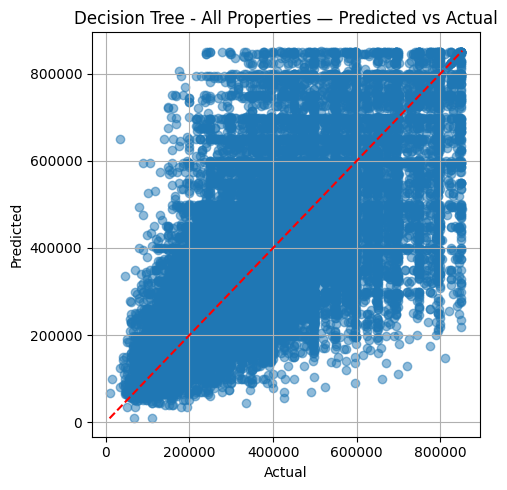

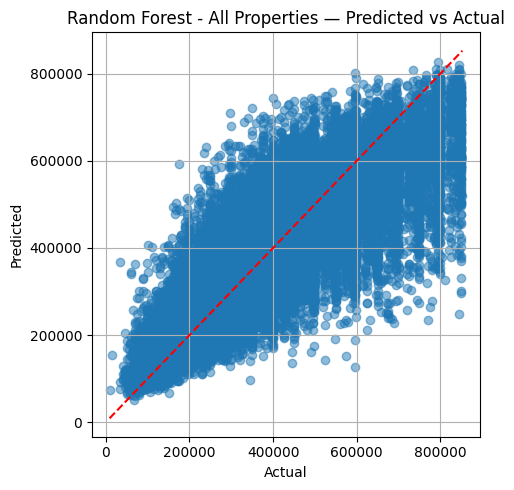

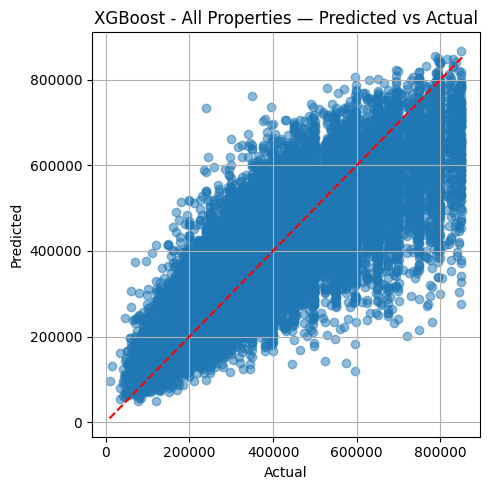

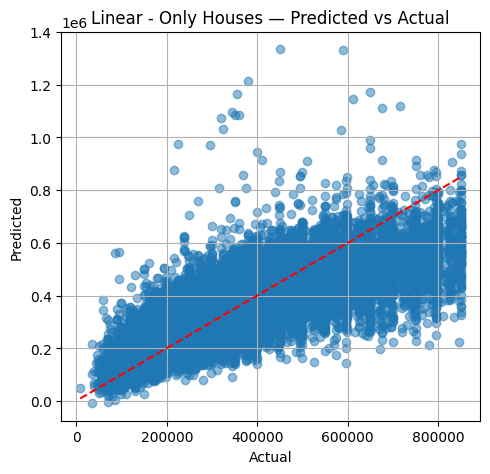

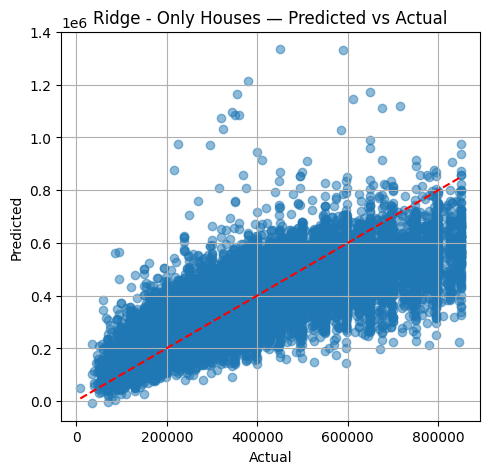

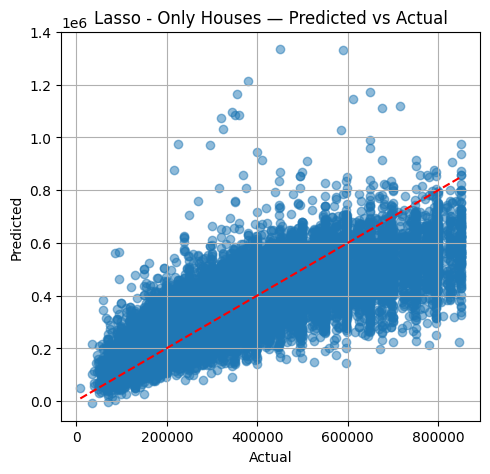

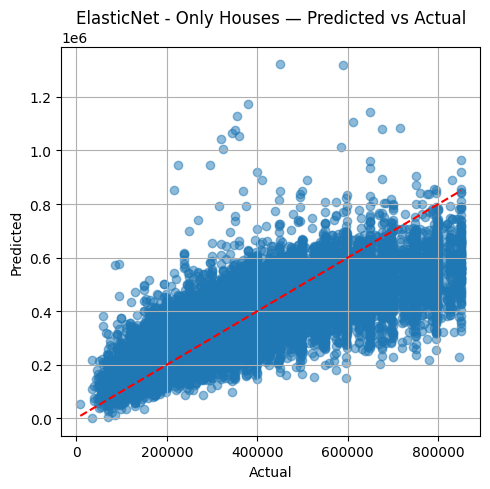

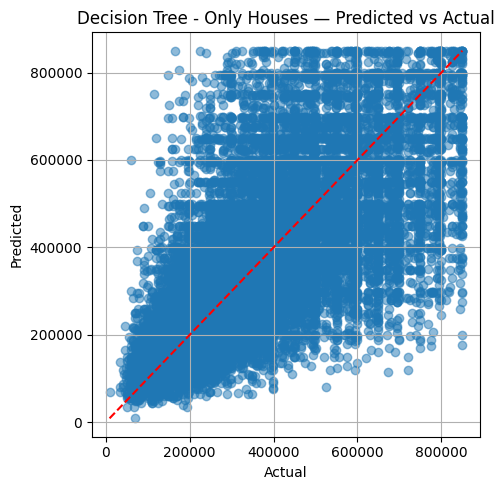

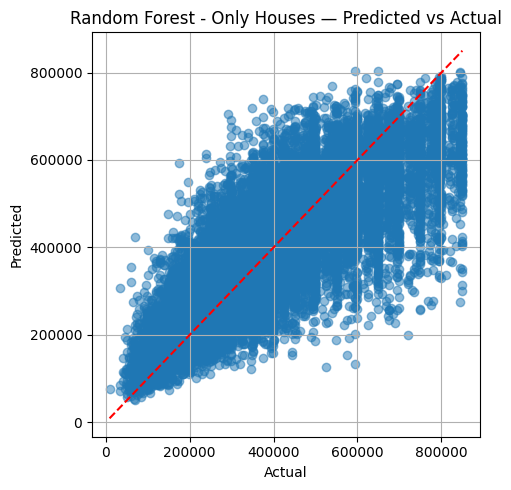

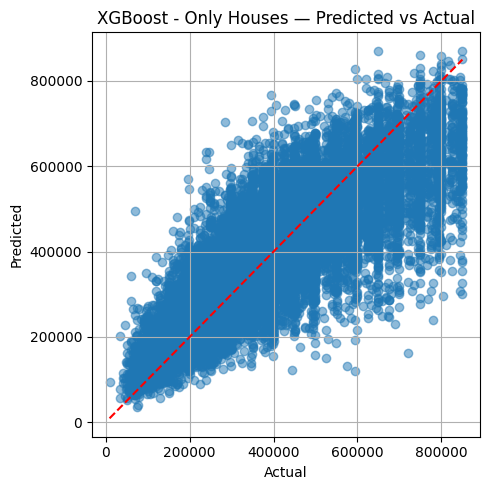

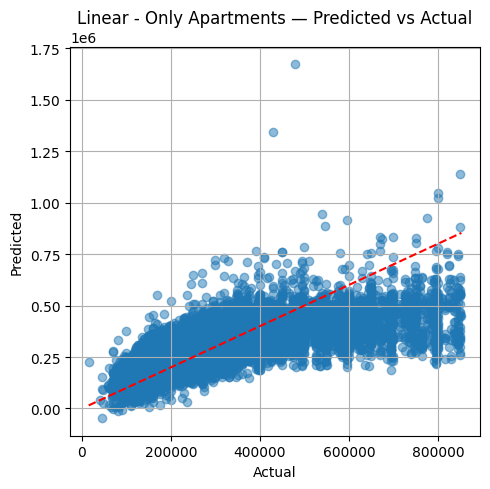

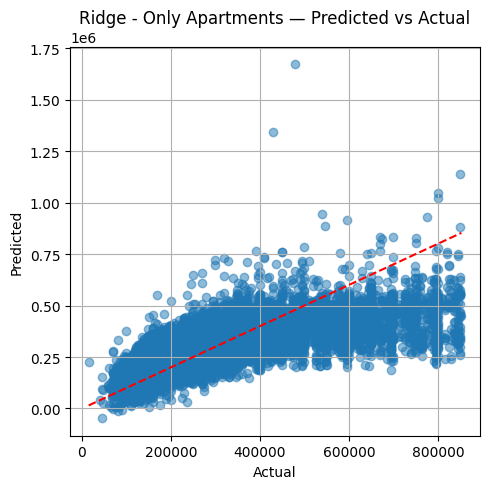

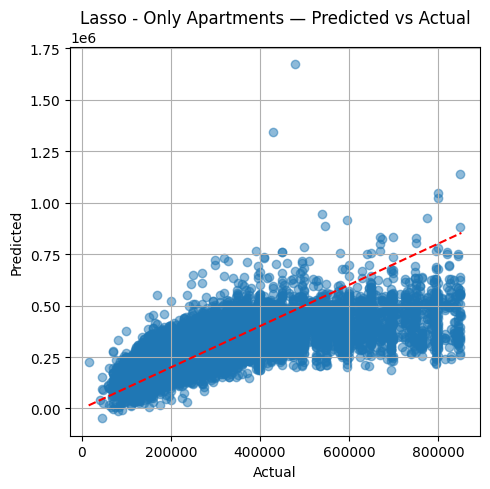

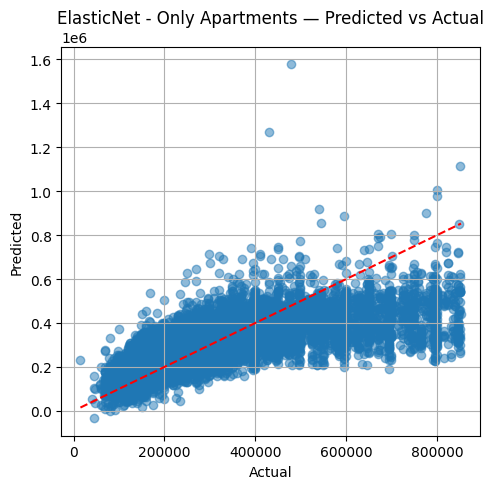

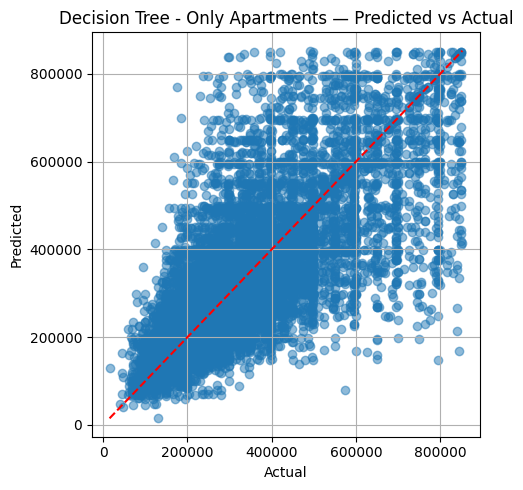

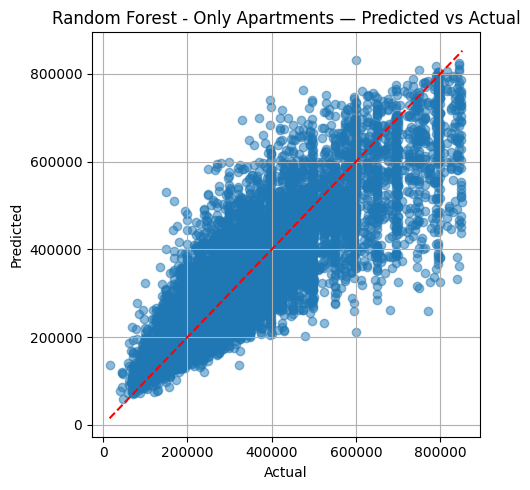

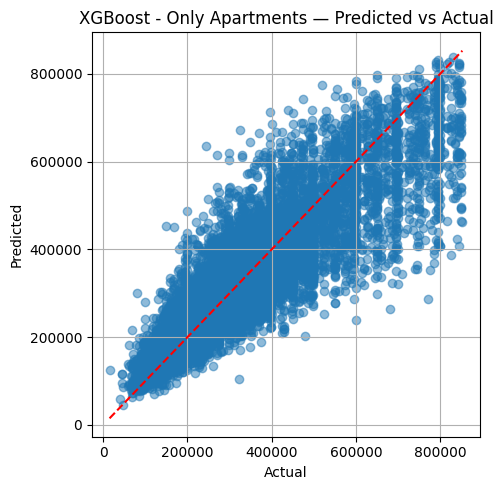


Summary of Regression Results:
            Dataset          Model  R² Score           MAE           RMSE
6    All Properties        XGBoost  0.738012  60048.528800   84478.882219
5    All Properties  Random Forest  0.707695  63465.052457   89233.123419
1    All Properties          Ridge  0.511477  84541.637279  115358.719230
2    All Properties          Lasso  0.511477  84541.557860  115358.724408
0    All Properties         Linear  0.511477  84541.557064  115358.724425
3    All Properties     ElasticNet  0.510798  84752.460762  115438.809228
4    All Properties  Decision Tree  0.427437  86043.719334  124887.617651
20  Only Apartments        XGBoost  0.776441  47895.456911   69945.136598
19  Only Apartments  Random Forest  0.743032  51187.219937   74989.533652
18  Only Apartments  Decision Tree  0.525139  67298.199899  101939.971049
15  Only Apartments          Ridge  0.452003  77456.949579  109509.176606
16  Only Apartments          Lasso  0.452003  77456.962193  109509.194577
14  On

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=123)

results = []

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=123),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=123),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=123)
}

datasets = {
    "All Properties": df_all,
    "Only Houses": df_hs,
    "Only Apartments": df_apt
}

for dataset_name, data in datasets.items():
    X, y = splitDF(data, target)

    for model_name, model in models.items():

        if model_name in ["Linear", "Ridge", "Lasso", "ElasticNet"]:
            pipeline = make_pipeline(StandardScaler(), model)
        else:
            pipeline = make_pipeline(model)

        y_pred = cross_val_predict(pipeline, X, y, cv=cv)
        regResults(dataset_name, model_name, y, y_pred)
        #plotPredictions(dataset_name, model_name, y, y_pred)

results_df = pd.DataFrame(results)
print("\nSummary of Regression Results:")
print(results_df.sort_values(by=["Dataset", "RMSE"]))

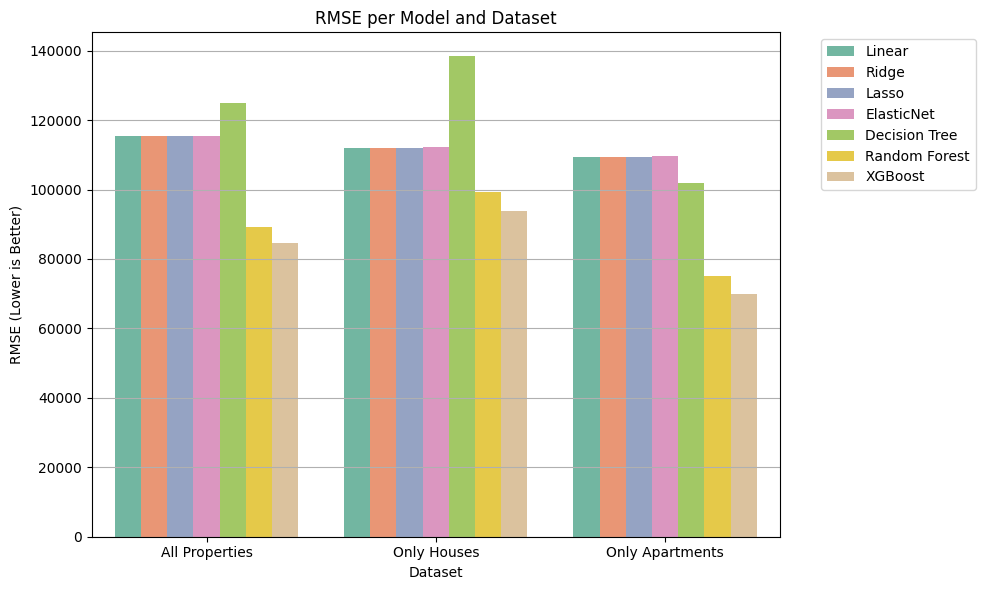

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x="Dataset", y="RMSE", hue="Model",
    palette="Set2"
)
plt.title("RMSE per Model and Dataset")
plt.ylabel("RMSE (Lower is Better)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

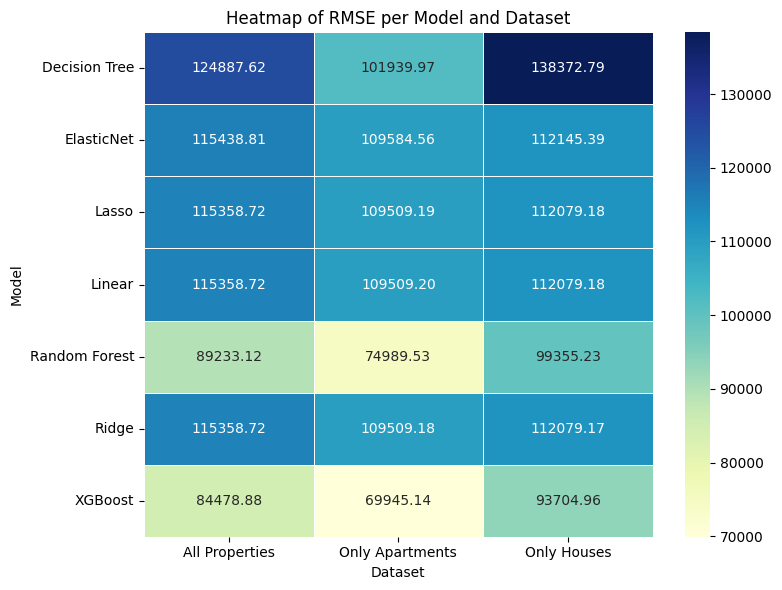

In [10]:
pivot_df = results_df.pivot(index="Model", columns="Dataset", values="RMSE")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of RMSE per Model and Dataset")
plt.ylabel("Model")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()
